In [32]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_parquet("tabelle.parquet")

In [5]:
df

,filename,text,group,list_tokens,list_of_cunks
0,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[creative, things, language, trick, question, ..."
1,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[mean, language, like, f, sound, comes, mouth,..."
2,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[like, making, music, mean, like, elaborate, t..."
3,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[repeat, question, th, like, trick, question, ..."
4,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[like, English, language, like, language, expr..."
...,...,...,...,...,...
4551,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[like, concepts, like, life, scape, like, like..."
4552,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[know, like, scope, kind, thing, like, scope, ..."
4553,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[things, like, probably, cos, concept, like, i..."
4554,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[sense, wow, amazing, great, amazing, wow, bit..."


In [8]:
ratings = pd.read_excel("data_with_metadata(2).xlsx")

In [10]:
list(ratings.columns)

['Word',
 'Freq_HAL',
 'Freq_KF',
 'Freq_SUBTLEXUS',
 'Freq_SUBTLEXUS_Zipf',
 'Freq_SUBTLEXUK',
 'Freq_SUBTLEXUK_Zipf',
 'Freq_Blog',
 'Freq_Twitter',
 'Freq_News',
 'Freq_Cob',
 'Freq_CobW',
 'Freq_CobS',
 'Freq_Cob_Lemmas',
 'Freq_CobW_Lemmas',
 'Freq_CobS_Lemmas',
 'Freq_CYP_79_Zipf',
 'Freq_CYP_1012_Zipf',
 'Freq_CYP_13_Zipf',
 'CD_SUBTLEXUS',
 'CD_SUBTLEXUK',
 'CD_Blog',
 'CD_Twitter',
 'CD_News',
 'CD_CYP_79_sent_logLap',
 'CD_CYP_79_book_logLap',
 'CD_CYP_1012_sent_logLap',
 'CD_CYP_1012_book_logLap',
 'CD_CYP_13_sent_logLap',
 'CD_CYP_13_book_logLap',
 'Fam_Glasgow',
 'Fam_Brys',
 'Prevalence_Brys',
 'AoA_Kuper',
 'AoA_LWV',
 'AoA_Glasgow',
 'Freqtraj_TASA',
 'Cumfreq_TASA',
 'DPoS_Brys',
 'DPoS_VanH',
 'SCOPE_ID',
 'ELP_ID',
 'NLett',
 'UnigramF_Avg_C',
 'UnigramF_Avg_U',
 'BigramF_Avg_C',
 'BigramF_Avg_U',
 'TrigramF_Avg_C',
 'TrigramF_Avg_U',
 'UnigramF_Avg_C_Log',
 'UnigramF_Avg_U_Log',
 'BigramF_Avg_C_Log',
 'BigramF_Avg_U_Log',
 'TrigramF_Avg_C_Log',
 'TrigramF_Avg_U_Log'

In [12]:
ratings = ratings[['Word','Conc_Brys',
 'Conc_Glasgow',
 'Imag_Glasgow',
 'Imag_Composite',
 'Conc_GPT4o_dom',
 'Conc_GPT4o_prob',]]

In [14]:
ratings

,Word,Conc_Brys,Conc_Glasgow,Imag_Glasgow,Imag_Composite,Conc_GPT4o_dom,Conc_GPT4o_prob
0,'em,NaN,NaN,NaN,NaN,NaN,NaN
1,'neath,NaN,NaN,NaN,NaN,NaN,NaN
2,'re,NaN,NaN,NaN,NaN,NaN,NaN
3,'shun,NaN,NaN,NaN,NaN,NaN,NaN
4,'tis,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
187924,zuwnaxtaysiyihd,NaN,NaN,NaN,NaN,NaN,NaN
187925,zuwnaxveyihk,NaN,NaN,NaN,NaN,NaN,NaN
187926,zuwnow,NaN,NaN,NaN,NaN,NaN,NaN
187927,zuwskaxnz,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ratings_agg = (
    ratings
    .drop_duplicates("Word", keep="first")
    .set_index("Word")
)

In [20]:
ratings_agg

,Conc_Brys,Conc_Glasgow,Imag_Glasgow,Imag_Composite,Conc_GPT4o_dom,Conc_GPT4o_prob
Word,,,,,,
'em,NaN,NaN,NaN,NaN,NaN,NaN
'neath,NaN,NaN,NaN,NaN,NaN,NaN
're,NaN,NaN,NaN,NaN,NaN,NaN
'shun,NaN,NaN,NaN,NaN,NaN,NaN
'tis,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
zuwnaxtaysiyihd,NaN,NaN,NaN,NaN,NaN,NaN
zuwnaxveyihk,NaN,NaN,NaN,NaN,NaN,NaN
zuwnow,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings = {w: tuple(row) for w, row in ratings_agg.iterrows()}


In [24]:
ratings

{"'em": (nan, nan, nan, nan, nan, nan),
 "'neath": (nan, nan, nan, nan, nan, nan),
 "'re": (nan, nan, nan, nan, nan, nan),
 "'shun": (nan, nan, nan, nan, nan, nan),
 "'tis": (nan, nan, nan, nan, nan, nan),
 "'twas": (nan, nan, nan, nan, nan, nan),
 "'tween": (nan, nan, nan, nan, nan, nan),
 "'twere": (nan, nan, nan, nan, nan, nan),
 "'twill": (nan, nan, nan, nan, nan, nan),
 "'twixt": (nan, nan, nan, nan, nan, nan),
 "'twould": (nan, nan, nan, nan, nan, nan),
 "'un": (nan, nan, nan, nan, nan, nan),
 "'ve": (nan, nan, nan, nan, nan, nan),
 '_clair': (nan, nan, nan, nan, nan, nan),
 '_clairs': (nan, nan, nan, nan, nan, nan),
 '_clat': (nan, nan, nan, nan, nan, nan),
 '_cru': (nan, nan, nan, nan, nan, nan),
 '_lan': (nan, nan, nan, nan, nan, nan),
 '_p_e': (nan, nan, nan, nan, nan, nan),
 'a': (1.46, nan, nan, 1.81, 1.0, 1.00436995377777),
 "a's": (nan, nan, nan, nan, 1.0, 1.482005006131),
 'AA': (nan, nan, nan, nan, 1.0, 1.7769661973556),
 'AAAWWW': (nan, nan, nan, nan, 1.0, 1.3195728576

In [ ]:
Word 	Conc_Brys 	Conc_Glasgow 	Imag_Glasgow 	Imag_Composite 	Conc_GPT4o_dom 	Conc_GPT4o_prob

In [28]:
df.head(2)

,filename,text,group,list_tokens,list_of_cunks
0,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[creative, things, language, trick, question, ..."
1,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[mean, language, like, f, sound, comes, mouth,..."


In [74]:
def get_score(tokens):
    if tokens.size == 0:
        return np.nan

    vals = [ratings[t][0] for t in tokens if t in ratings]
    return np.nanmean(vals) if vals else np.nan


In [76]:
df["conc_brysbert"] = df["list_of_cunks"].apply(get_score)

/var/folders/1d/_l4c6ssx7s5004xlgs78x3440000gn/T/ipykernel_89090/3936240579.py:6: RuntimeWarning: Mean of empty slice
  return np.nanmean(vals) if vals else np.nan


In [78]:
df.iloc[0,-2]

array(['creative', 'things', 'language', 'trick', 'question', 'creative',
       'things', 'lang', 'mean', 'like'], dtype=object)

In [80]:
df

,filename,text,group,list_tokens,list_of_cunks,conc_brysbert
0,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[creative, things, language, trick, question, ...",2.474286
1,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[mean, language, like, f, sound, comes, mouth,...",2.658750
2,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[like, making, music, mean, like, elaborate, t...",2.477778
3,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[repeat, question, th, like, trick, question, ...",2.575556
4,21AP15_Raw.txt,do I do creative things with language y er er...,scz,"[creative, things, language, trick, question, ...","[like, English, language, like, language, expr...",2.605556
...,...,...,...,...,...,...
4551,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[like, concepts, like, life, scape, like, like...",2.296250
4552,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[know, like, scope, kind, thing, like, scope, ...",2.549000
4553,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[things, like, probably, cos, concept, like, i...",2.238333
4554,09AR14_Raw.txt,oh OK cool er it was it was interesting i...,hc,"[OK, cool, interesting, good, like, makes, sen...","[sense, wow, amazing, great, amazing, wow, bit...",1.946000


In [82]:
ratings["trick"]

(3.36, 3.971, 3.394, 4.23, 3.0, 2.94265708181131)

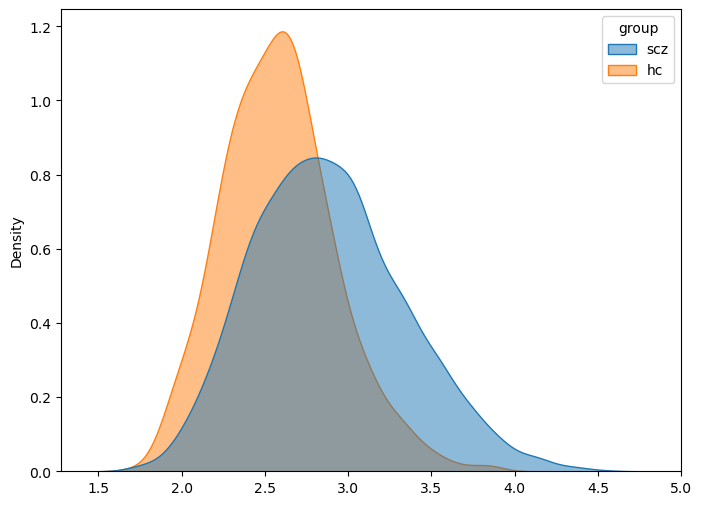

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df,
    x='conc_brysbert',
    hue='group',         # change this to your class column
    fill=True,
    common_norm=False,   # each class gets its own density scale
    alpha=0.5
)

plt.title("")
plt.xlabel("")
plt.ylabel("Density")
plt.show()